<center><h1>Fundamentos Data Science parte 2</h1><center>
    Autor: Walther Becks

## Desafío 2: Rendimiento escolar

Lo contactan de una escuela Portuguesa para generar **un modelo que identifique aquellos
alumnos** que presentan un bajo desempeño académico, **medido en el promedio final del año
escolar**. Para ello le envían un archivo con registros sociodemográficos y conductuales de
los alumnos de dos escuelas **para perfilar a los estudiantes**.
De manera adicional la psicopedagoga sugiere inspeccionar una batería de preguntas
asociadas a aspectos ambientales del alumno (de famrel a health) y ver si éstas se
pueden **abstraer en categorías latentes.**

**Datos Asociados: students.csv**

## Hito 1: Análisis preliminar

1. Se nos pide desarrollar uno modelo predictivo a partir de las notas finales del alumno (G3) para identificar aquellos alumnos con bajo desempeño académico. Junto a eso, nos solicitan la modelación de 3 modelos descriptivos (G1, G2, G3), es por esto que como primer paso debemos validar los 3 primeros desde la econometría y uno desde el ML.

2. Estamos frente a un problema de **Regresión** ya que los **vectores objetivo** son de naturaleza numérica.

**Librerías a utilizar:** 

1. pandas == 1.2.0
2. numpy == 1.20.3
3. scipy == 1.7.3  
4. matplotlib == 3.0.3
5. seaborn == 0.11.2 
6. statsmodels == 0.13.2
7. conda == 4.8.3
8. python == 3.7.3
9. missingno == 0.5.1

-------------

## Hito 2

### Importe de librerias

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import missingno
sns.set_style('darkgrid')

import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')

#para dsps:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,confusion_matrix,accuracy_score,precision_score, recall_score,roc_curve,roc_auc_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import functions_final
plt.style.use('seaborn') # gráficos estilo seaborn
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams["figure.dpi"] = 200
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Importe de datos

In [310]:
df = pd.read_csv('students.csv', sep = '|', encoding = 'latin1')
df = df.replace(['nulidade', 'sem validade', 'zero'], np.nan).drop('Unnamed: 0', axis = 1)
print(f"Contamos con {df.shape[0]} filas y {df.shape[1]} columnas")
df.head()

Contamos con 395 filas y 33 columnas


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,"""2""",2,3,"""3""",10,NaN,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,NaN,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,"""2""",1,2,"""5""",4,6,10,10


### Limpieza de base de datos

#### Valores nulos

In [311]:
df = df.replace(to_replace='?',value= np.nan)
df.apply(lambda x: f"{round((x[x.isna()].shape[0]/x.shape[0])*100, 2)}%").sort_values(ascending = False).to_frame().rename(columns = {0:'% nulos'})

,% nulos
schoolsup,2.03%
Pstatus,1.52%
higher,1.52%
nursery,1.52%
Mjob,1.52%
school,1.27%
studytime,1.27%
Walc,1.27%
goout,1.27%
famrel,1.27%


In [312]:
df_droped_na = df.dropna()
print(f"Si se limpia la base de valores nulos, remanece el {round(df_droped_na.shape[0]/df.shape[0]*100)}% de los datos, implica {df_droped_na.shape[0]} filas, se perdieron {df.shape[0]-df_droped_na.shape[0]} filas.\nEs por esto que no se remueven los valores nulos y se conservarn las {df.shape[0]} filas.")

Si se limpia la base de valores nulos, remanece el 72% de los datos, implica 284 filas, se perdieron 111 filas.
Es por esto que no se remueven los valores nulos y se conservarn las 395 filas.


In [313]:
df_droped_na.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,"""3""",1,1,"""3""",4,5,5,6
3,GP,F,"""15""",U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,"""2""",1,1,"""5""",2,15,14,15
5,GP,M,"""16""",U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,"""2""",1,2,"""5""",10,15,15,15
6,GP,M,"""16""",U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,"""4""",1,1,"""3""",0,12,12,11
7,GP,F,"""17""",U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,"""4""",1,1,"""1""",6,6,5,6


#### Recodificación de las variables

1. Utilizando el importe de functions, recodificaremos y binarizaremos las variables
2. Normalizaremos las varibles numéricas (excepto las binarias).

In [314]:
df_recodificacion = functions_final.recodificaciones_d2(df)  
df_bin = functions_final.normalizar(df_recodificacion,exclude = df_recodificacion.select_dtypes('uint8').columns)

print(df_bin.shape)
print(f"**De las {df.shape[1]} columnas originales, se procedió a agregar {df_bin.shape[1]-df.shape[1]} columnas binarias, dejando un total {df_bin.shape[1]} columnas**")
df_bin.head()

(395, 42)
**De las 33 columnas originales, se procedió a agregar 9 columnas binarias, dejando un total 42 columnas**


,age,Medu,Fedu,traveltime,studytime,failures,absences,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,NaN,1.148348,1.353982,0.784575,-0.045626,-0.449732,0.033463,0.057172,-0.229774,0.802982,-0.539851,-1.000878,-0.414094,-1.786881,-1.253202,-0.973385,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.235882,-1.590916,-1.401077,-0.645906,-0.045626,-0.449732,-0.215756,1.172033,-0.229774,-0.091769,-0.539851,-1.000878,-0.414094,-1.786881,-1.519053,-0.973385,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,-1.327336,-1.590916,-1.401077,-0.645906,-0.045626,3.566962,0.531900,0.057172,-0.229774,-0.986521,0.579840,0.545033,-0.414094,NaN,-0.721500,-0.097729,0,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,-1.327336,1.148348,-0.482724,-0.645906,1.140655,-0.449732,-0.464974,-1.057688,-1.233121,-0.986521,-0.539851,-1.000878,1.038020,1.224630,0.873607,0.996840,0,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
4,NaN,0.235260,0.435629,-0.645906,-0.045626,-0.449732,-0.215756,0.057172,-0.229774,-0.986521,-0.539851,-0.227923,1.038020,-1.485730,-0.189797,-0.097729,0,0,1,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0


### Analisis G1

In [315]:
df_bin.corr()['G1'].to_frame().assign(absolute = df_bin.corr()['G1'].abs()).sort_values(by='absolute', ascending = False).drop('absolute',axis=1)[1:]

,G1
G2,0.851263
G3,0.801366
failures,-0.352140
schoolsup_yes,-0.201652
Medu,0.193389
higher_yes,0.192750
Fedu,0.183592
Fjob_teacher,0.167539
Mjob_other,-0.165933
studytime,0.165170


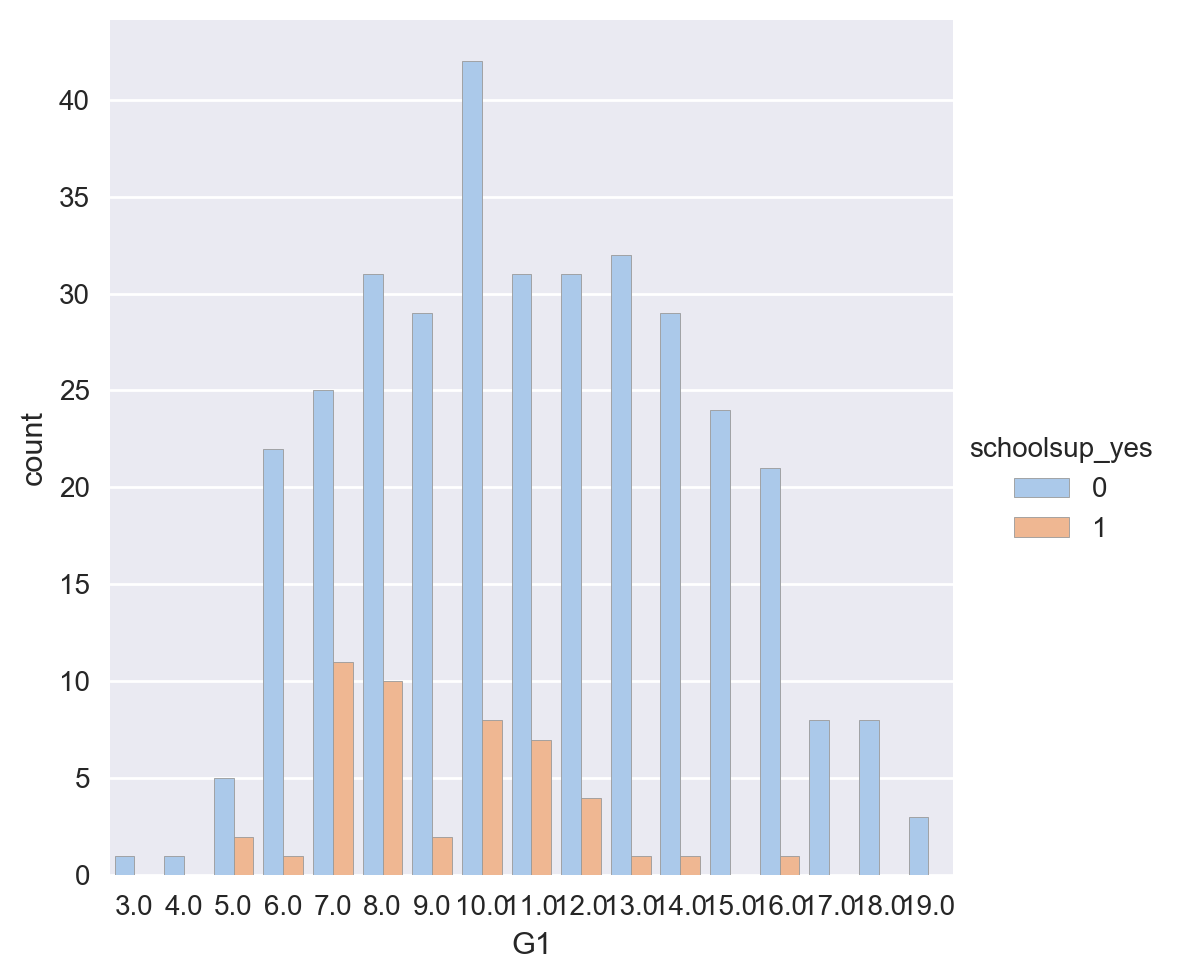

In [316]:
sns.catplot(x='G1',data=df_recodificacion,hue='schoolsup_yes',kind="count",
            palette="pastel", edgecolor=".6")

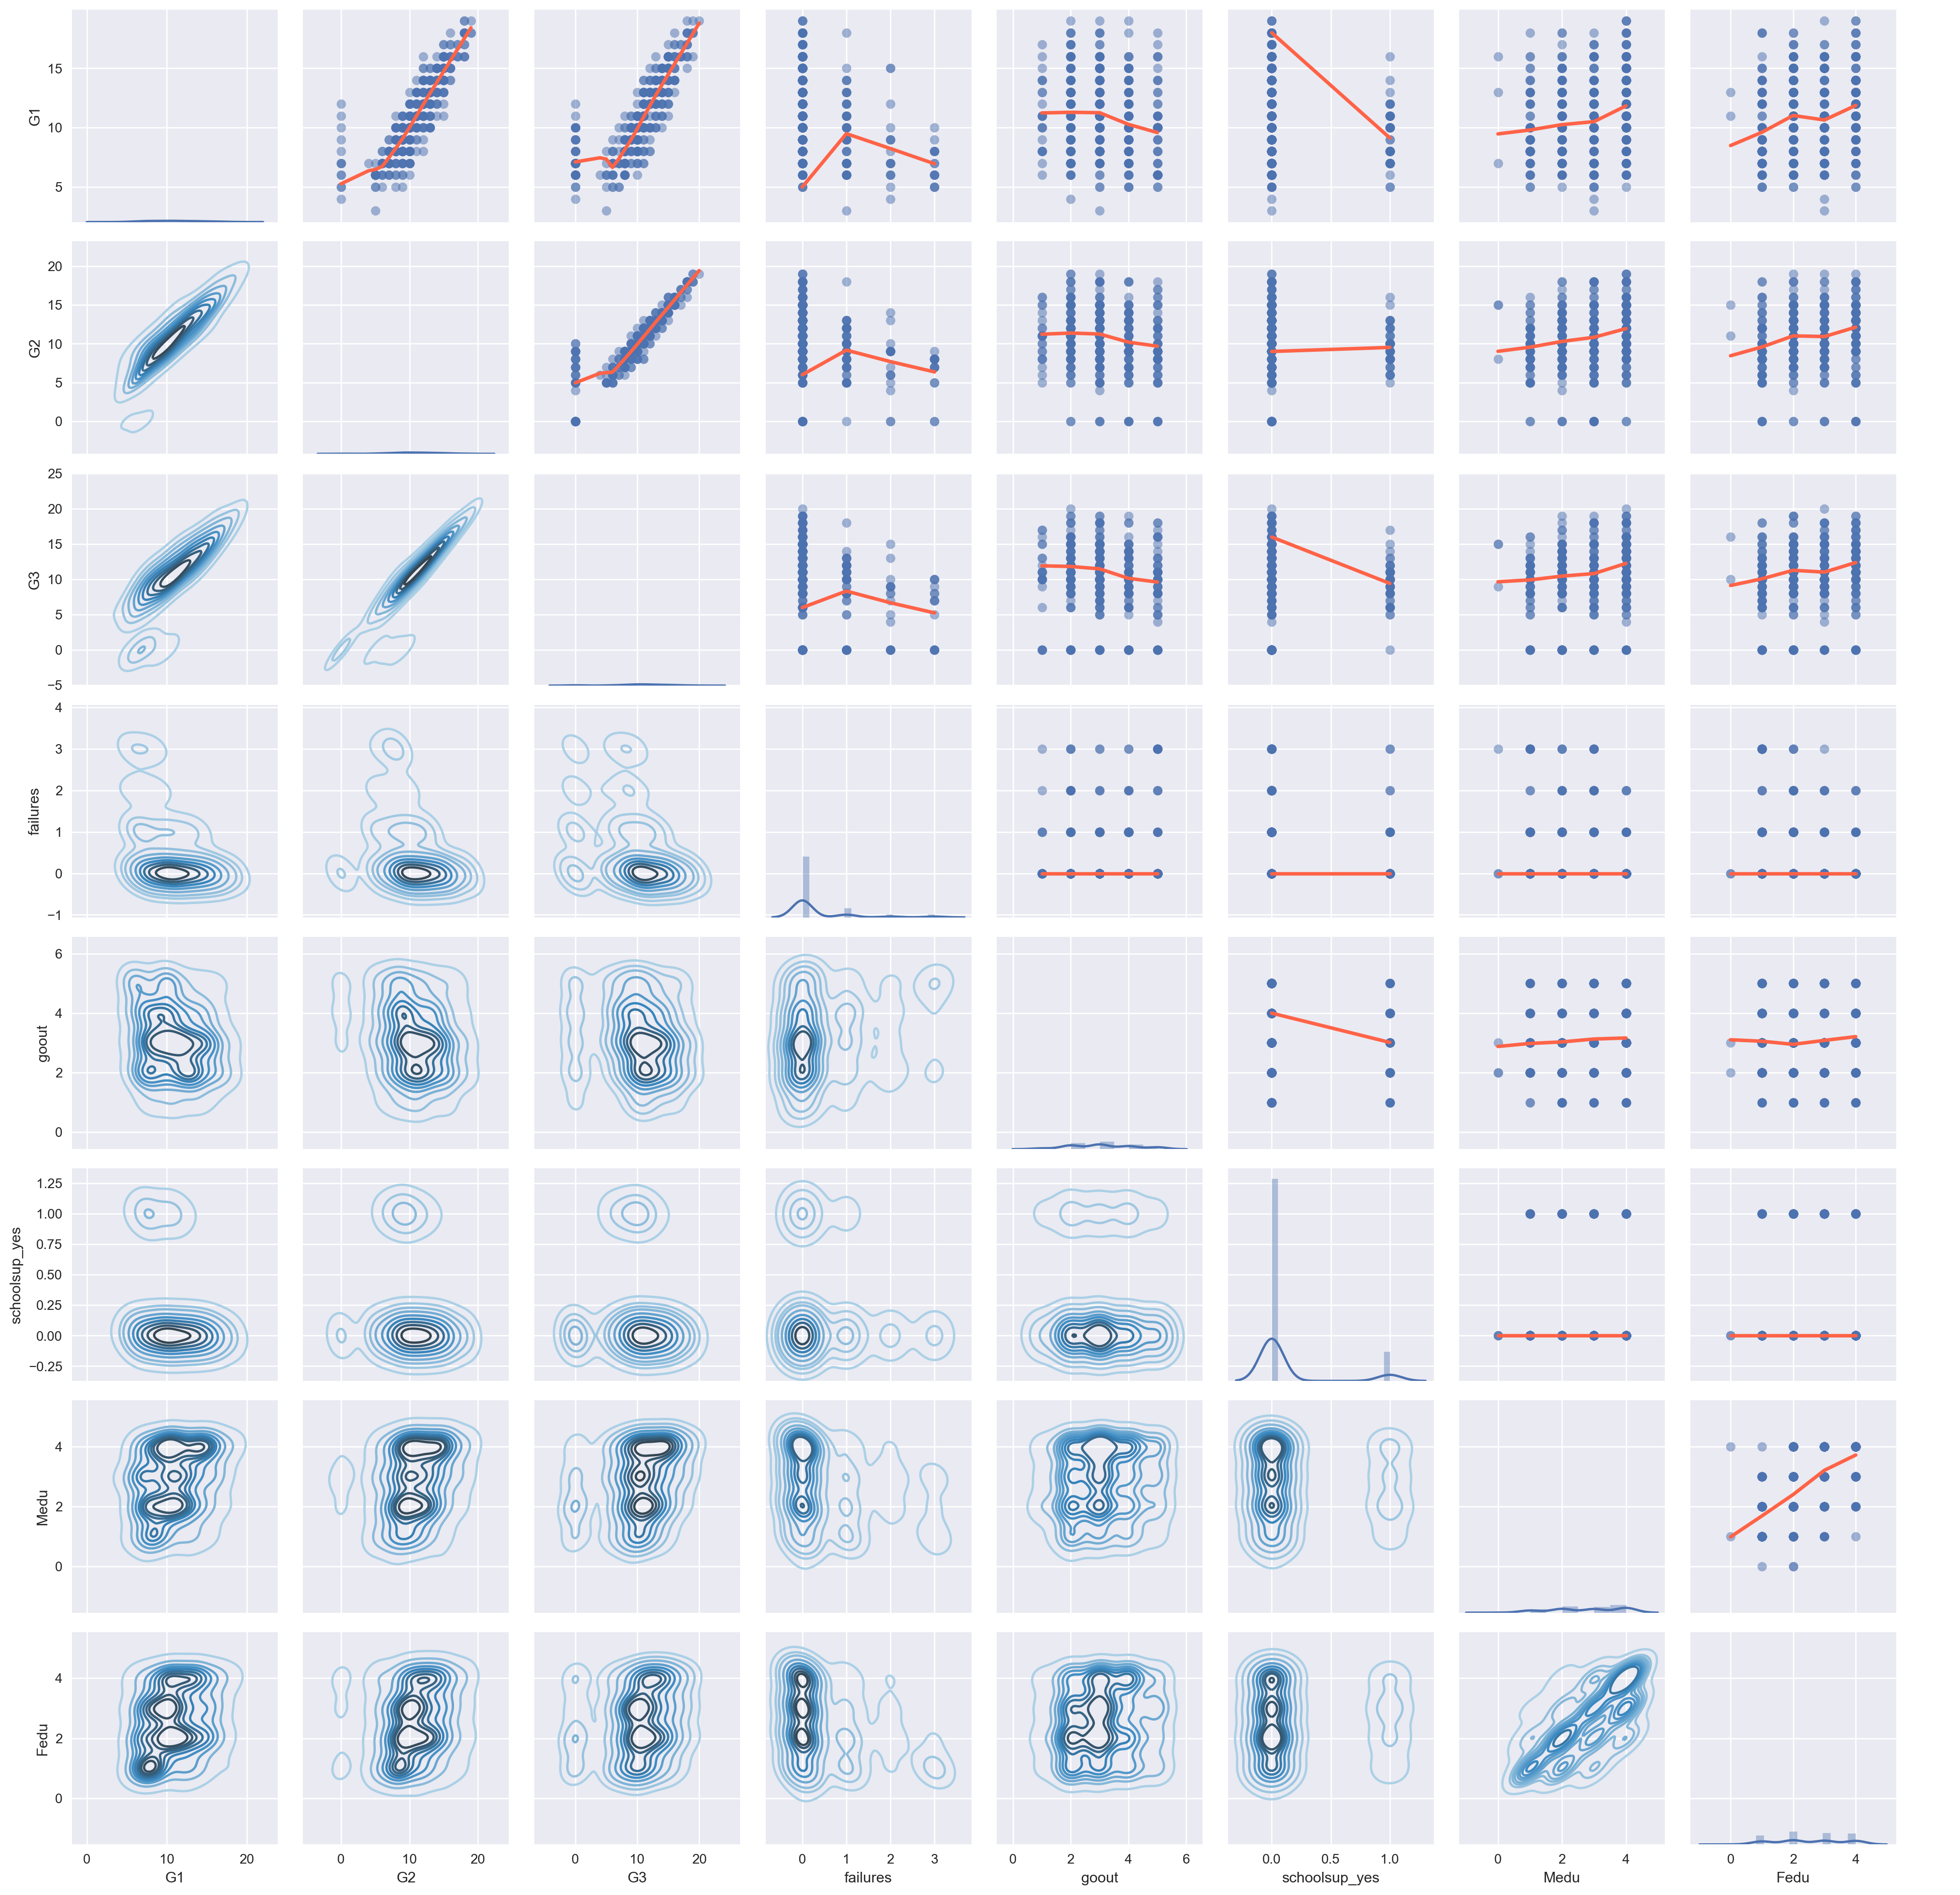

In [317]:
grid = sns.PairGrid(df_recodificacion.loc[:,['G1','G2','G3', 'failures', 'goout', 'schoolsup_yes','Medu', 'Fedu']])
grid = grid.map_diag(sns.distplot)
grid = grid.map_upper(sns.regplot, lowess=True,scatter_kws={'alpha':.5},line_kws={'color':'tomato'})
grid = grid.map_lower(sns.kdeplot, cmap='Blues_d')

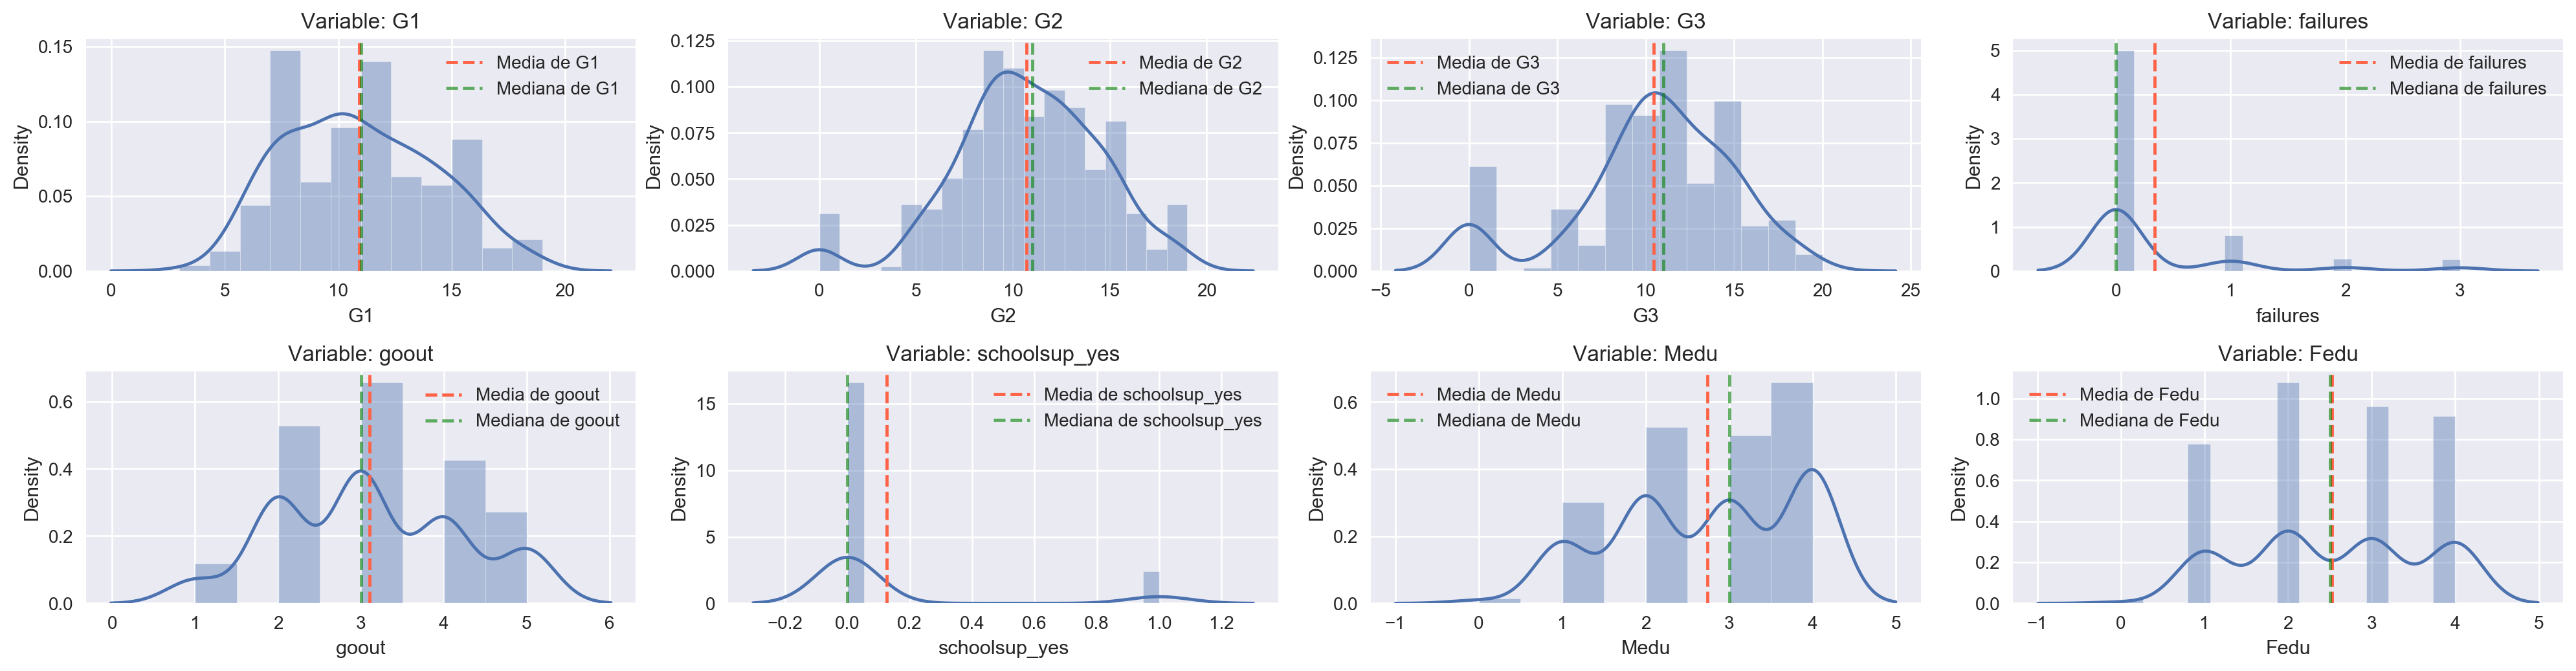

In [318]:
plt.figure(figsize = (20,10))
functions_final.plot_hist(df_recodificacion, ['G1','G2','G3', 'failures', 'goout', 'schoolsup_yes','Medu', 'Fedu'])
plt.tight_layout()

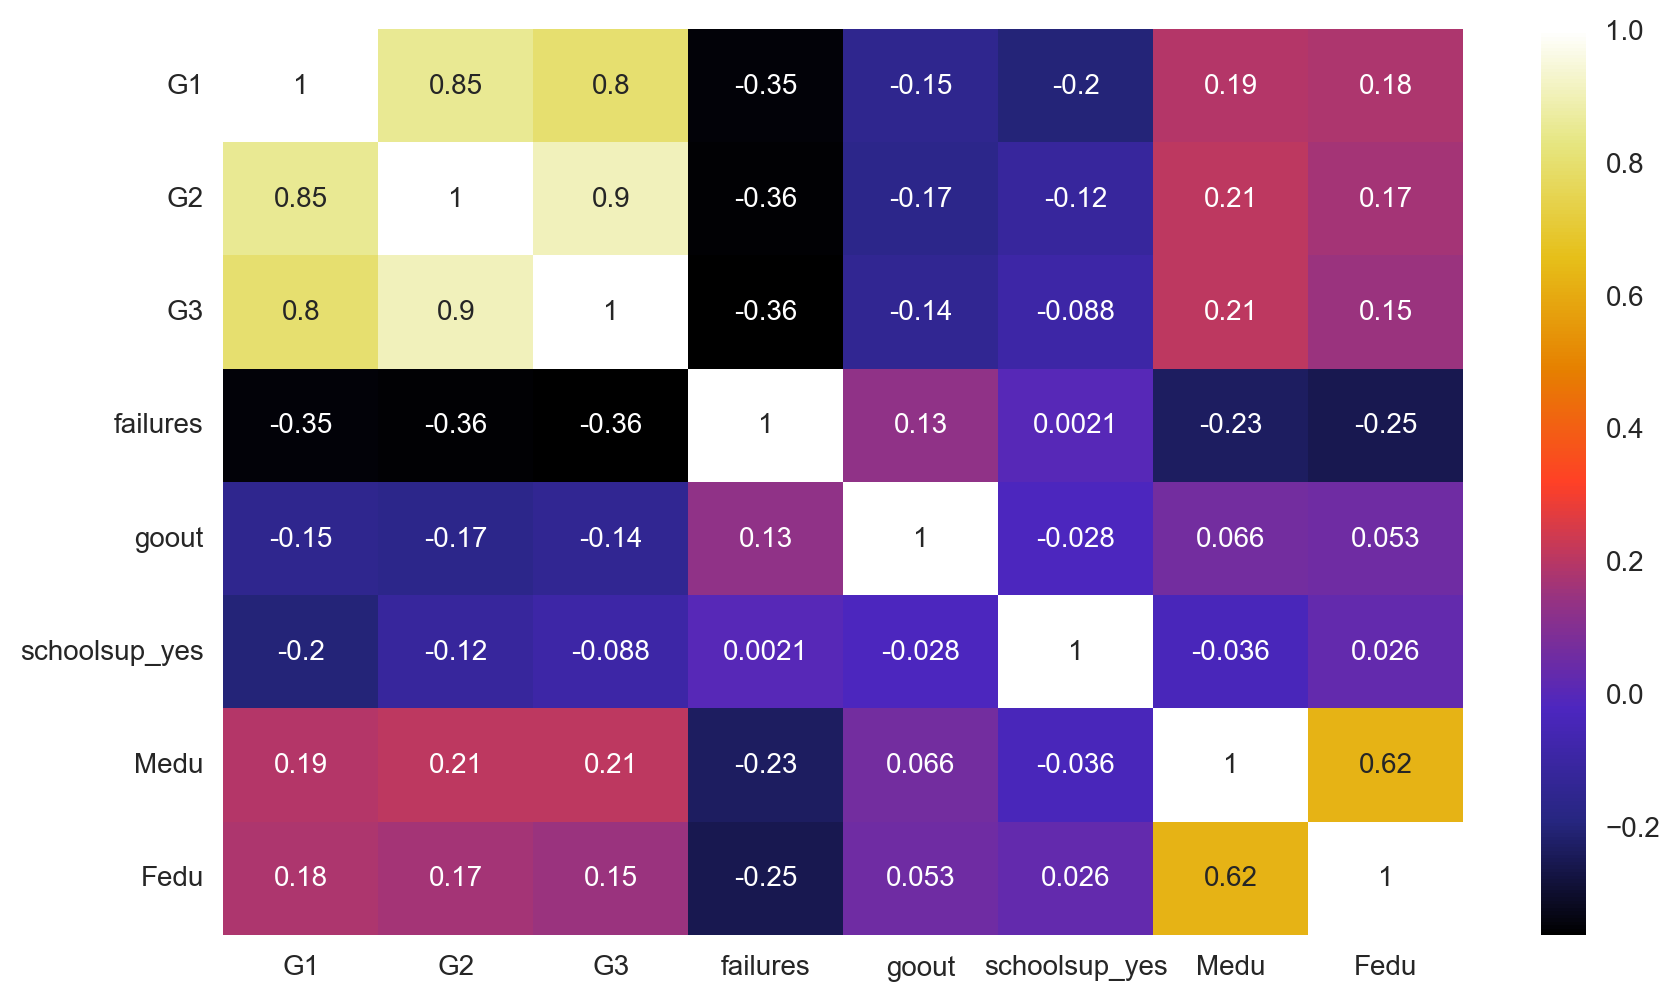

In [319]:
sns.heatmap(df_recodificacion.loc[:, ['G1','G2','G3', 'failures', 'goout', 'schoolsup_yes','Medu', 'Fedu']].corr(), cmap = 'CMRmap', annot = True)

* Podemos observar alarmantemente que, en G1, G2 y G3 que a medida que pasa el tiempo, los alumnos con mal promedio se acrecentan sin poder controlarlos.
- Los G, presentan correlación fuerte con las variables G2 y G3, no es de extrañar dado que son similares y miden lo mismo.
    
- Los G, presenta correlación negativa con failures, no es de extrañar dado que es un indicador directo y opuesto a las notas presentes del semestre.
    - Es interesante evidenciar que failures junto con la *alta* educación de la madre/padre (más madre) tiene una correlación negativa y se puede ver el peso en el gráfico
- Es interesante ver la correlación negativa de goout con los G, se puede evidenciar de los gráficos que sobre la mediana 3 de salidas con amigos el promedio del semestre será peor. Seguramente debido a que salir 5 veces por semana no deja el tiempo suficiente para hacer los quehaceres.
- schoolsup_yes tiene una correlación negativa, ya que muestra que está más presente en alumnos con peor calificación pero a su vez hay casos en donde está presente en alumnos con muy buena calificación. Lo que podemos evidenciar es que no se encuentra en los extremos y es de carácter débil.
- Finalmente la educación del padre y la madre, tienen correlación con las notas de los alumnos más altas

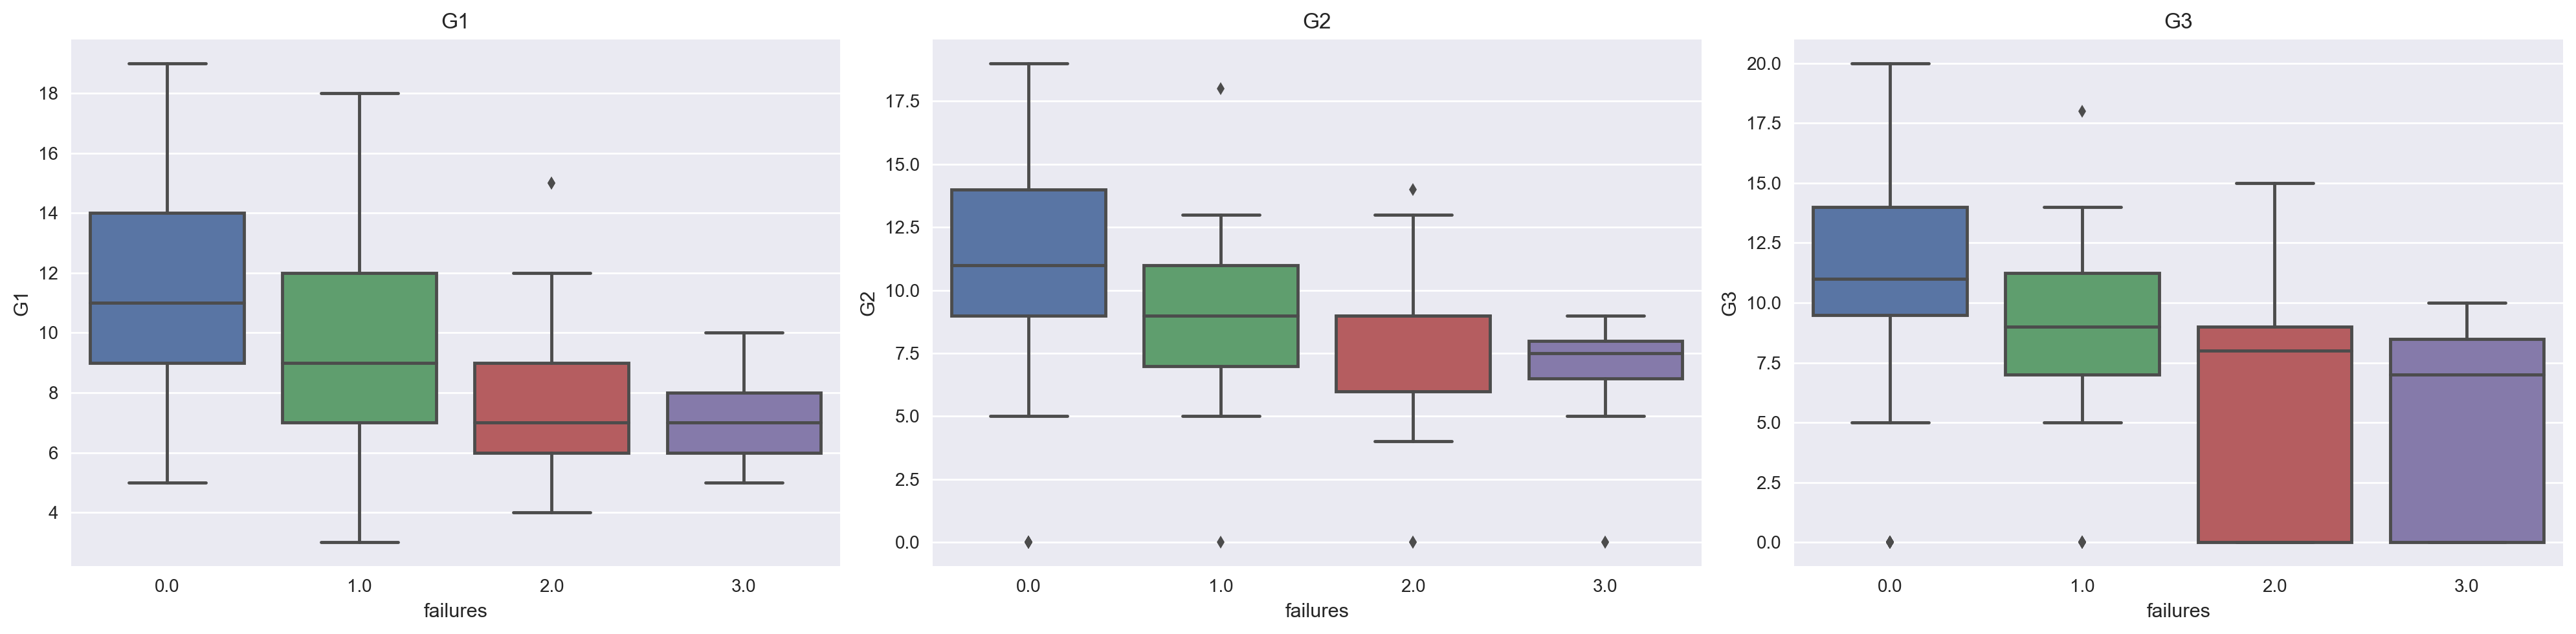

In [320]:
plt.figure(figsize = (20,5))
for index, column in enumerate(['G1', 'G2', 'G3']):
    
    plt.subplot(1,3,index+1)
    plt.title(column)
    sns.boxplot('failures',column, data = df_recodificacion)
    
    
plt.tight_layout()

* Podemos observar que a medida que avanza el año con failures positivos, en G3 aumenta su población alarmantemente

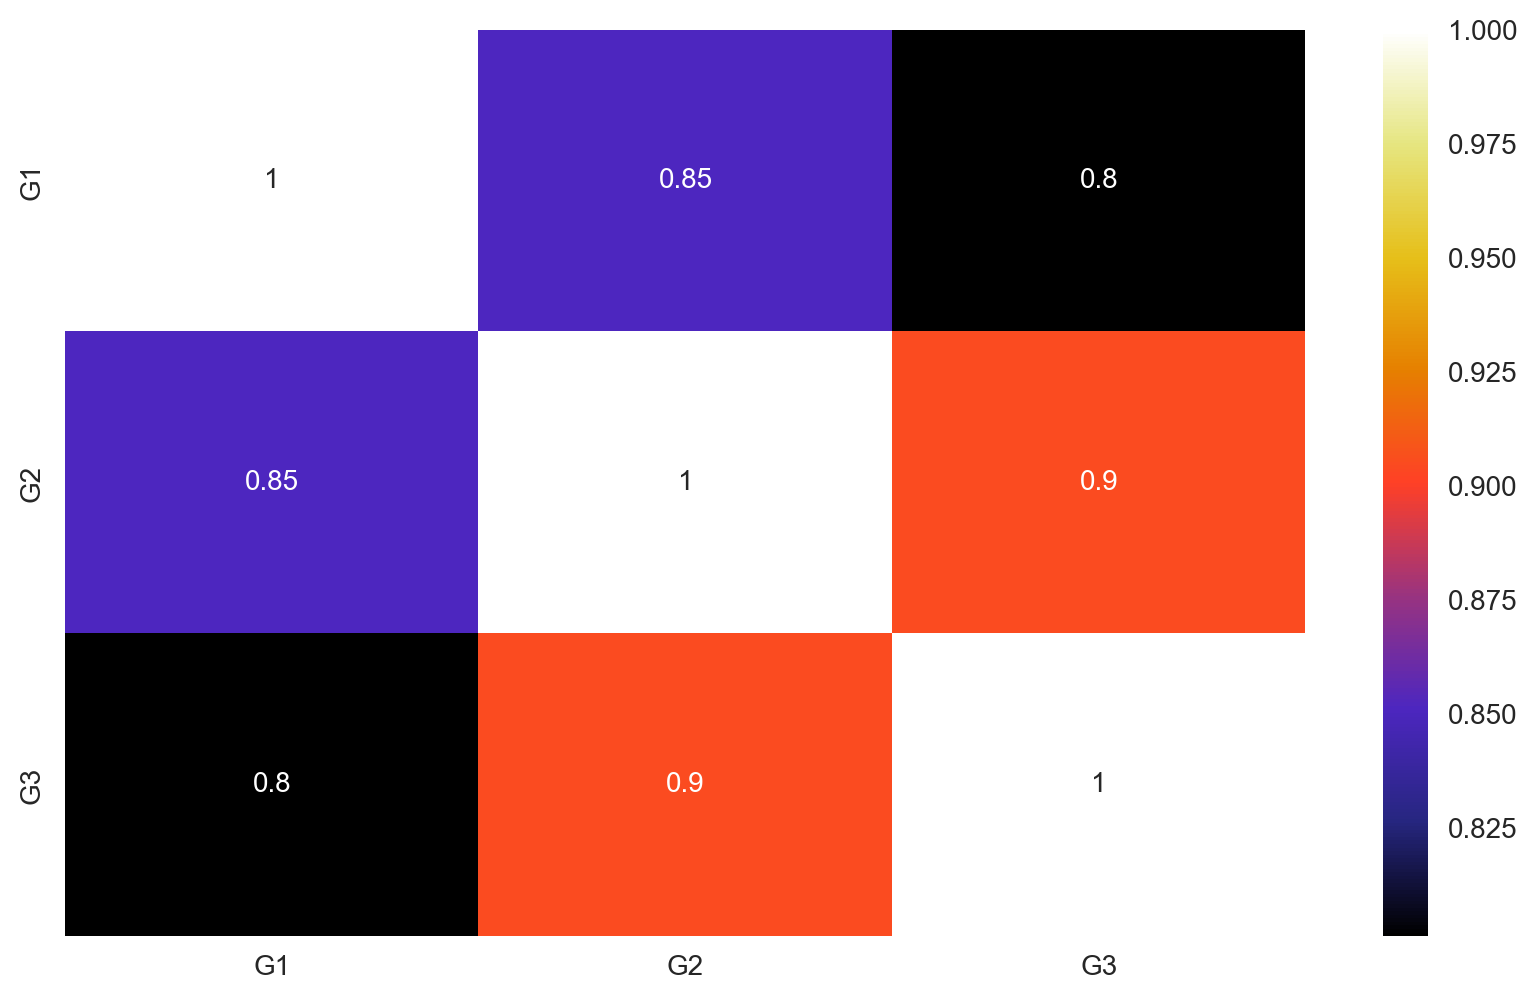

In [321]:
sns.heatmap(df_recodificacion.loc[:, ['G1','G2','G3']].corr(), cmap = 'CMRmap', annot = True)

* Podemos observar una fuerte correlación entre las notas de (G1, G2) y (G2 y G3)

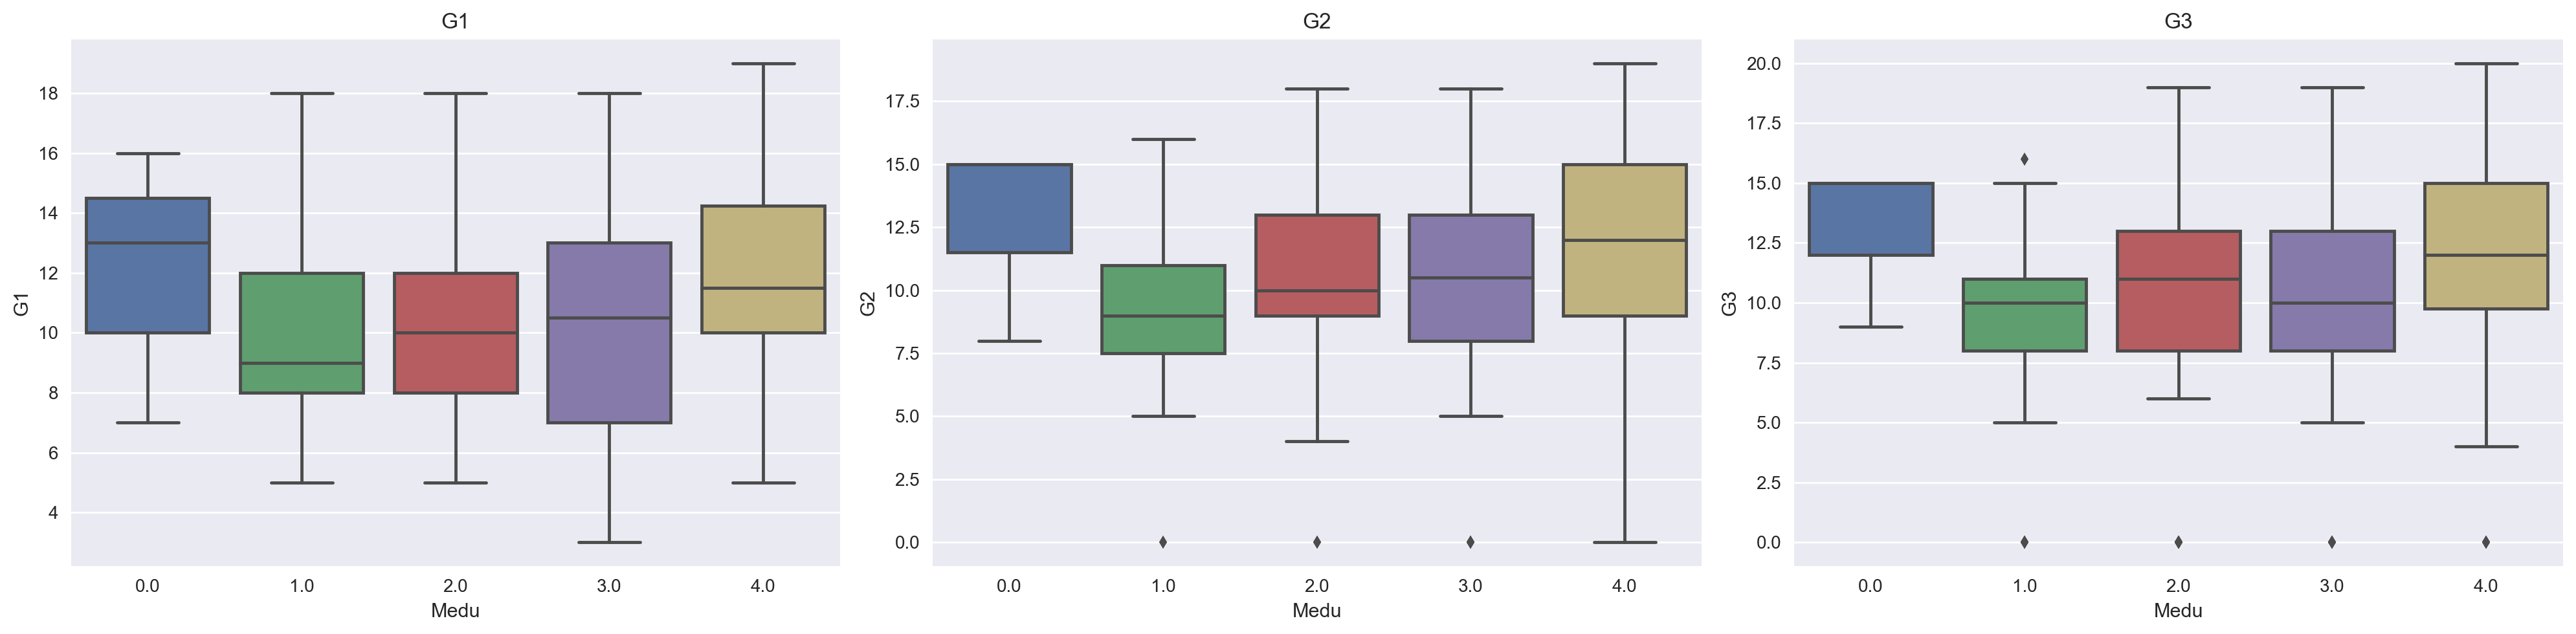

In [322]:
plt.figure(figsize = (20,5))
for index, column in enumerate(['G1', 'G2', 'G3']):
    
    plt.subplot(1,3,index+1)
    plt.title(column)
    sns.boxplot('Medu',column, data = df_recodificacion)
    
    
plt.tight_layout()

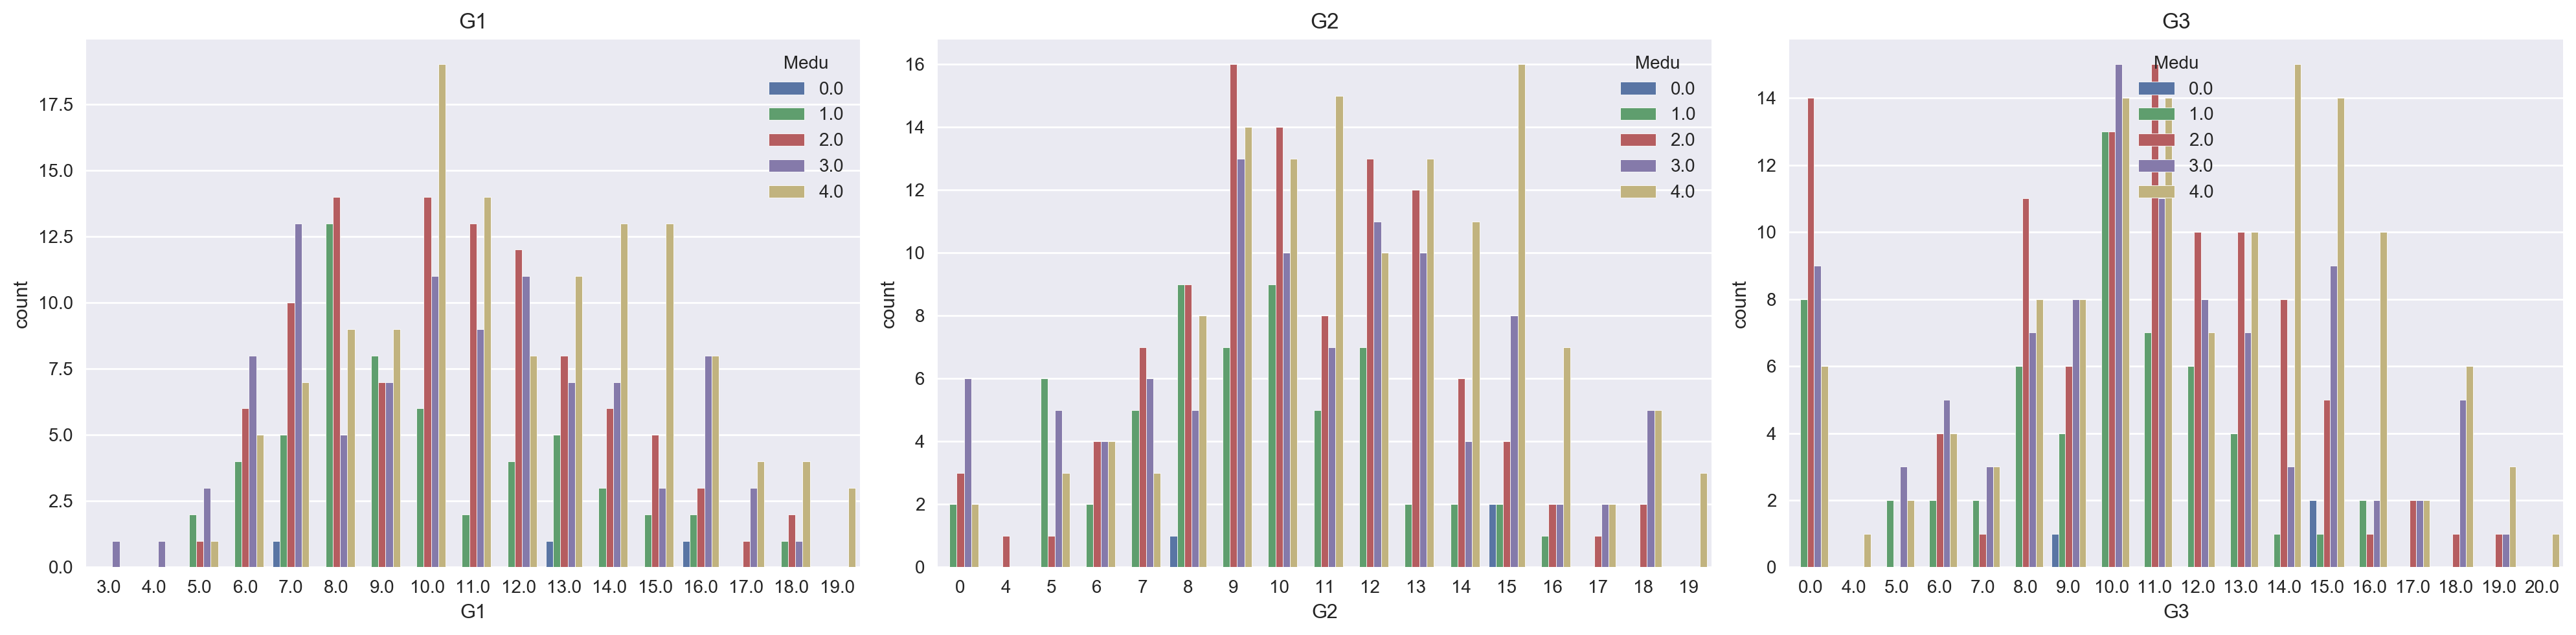

In [323]:
plt.figure(figsize = (20,5))
for index, column in enumerate(['G1', 'G2', 'G3']):
    
    plt.subplot(1,3,index+1)
    plt.title(column)
    sns.countplot(column,hue='Medu', data = df_recodificacion)
    
    
plt.tight_layout()

- Los estudios superiores de la madre demuestran que están correlacionados con las mejores calificaciones

## Hito 3

### Modelo descriptivo para G1
Se busca definir cuales son las principales determinantes del estudio. Gracias a este trabajo se podrá construir o depurar el modelo predictivo.

Genereraremos un modelo de regresión lineal para la variable G1, excluyendo G2 y G3-

- Se puede observar que para este modelo tenemos un R-squared de 34% con un R ajustado de 25.5%, no obstante el modelo es significativo dado que la Prob F-statistic es menor a 0.05

In [324]:
modelo_g1 = smf.ols(f"G1 ~ {' + '.join(df_bin.drop(['G1','G2', 'G3'], axis = 1).columns.tolist())}", df_bin).fit()
modelo_g1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3.988
Date:                Sun, 29 May 2022   Prob (F-statistic):           3.80e-12
Time:                        22:53:23   Log-Likelihood:                -411.66
No. Observations:                 341   AIC:                             903.3
Df Residuals:                     301   BIC:                             1057.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0043      0.418      0.010      0.992      -0.819       0.828
age                  -0.0056      0.064     -0.088      0.930      -0.131       0.119
Medu                  0.0382      0.080      0.475      0.635      -0.120       0.196
Fedu                  0.0501      0.067      0.751      0.453      -0.081       0.181
traveltime            0.0181      0.054      0.336      0.737      -0.088       0.124
studytime             0.1763      0.056      3.171      0.002       0.067       0.286
failures             -0.2961      0.057     -5.206      0.000      -0.408      -0.184
absences              0.0200      0.051      0.390      0.697      -0.081       0.121
famrel                0.0132      0.050      0.262      0.794      -0.086       0.113
freetime              0.1133      0.052      2.160      0.032       0.010       0.217
goout                -0.2028      0.058     -3.479      0.001      -0.317      -0.088
Dalc                  0.0007      0.068      0.011      0.991      -0.133       0.135
Walc                  0.0148      0.072      0.205      0.838      -0.127       0.157
health               -0.0772      0.052     -1.483      0.139      -0.180       0.025
school_MS            -0.0430      0.178     -0.241      0.809      -0.394       0.308
sex_M                 0.2131      0.114      1.866      0.063      -0.012       0.438
address_U             0.0582      0.131      0.444      0.657      -0.200       0.316
famsize_LE3           0.1431      0.113      1.266      0.206      -0.079       0.365
Pstatus_T            -0.0146      0.163     -0.089      0.929      -0.336       0.307
schoolsup_yes        -0.5613      0.151     -3.714      0.000      -0.859      -0.264
famsup_yes           -0.3409      0.109     -3.118      0.002      -0.556      -0.126
paid_yes             -0.0212      0.108     -0.196      0.845      -0.235       0.192
activities_yes       -0.1042      0.099     -1.050      0.295      -0.300       0.091
nursery_yes           0.0075      0.121      0.062      0.950      -0.230       0.245
higher_yes            0.4038      0.205      1.972      0.050       0.001       0.807
internet_yes          0.0738      0.135      0.545      0.586      -0.193       0.340
romantic_yes         -0.0766      0.107     -0.715      0.475      -0.287       0.134
Mjob_health           0.3059      0.243      1.258      0.209      -0.173       0.784
Mjob_other           -0.2656      0.157     -1.696      0.091      -0.574       0.043
Mjob_services         0.0962      0.179      0.537      0.592      -0.256       0.448
Mjob_teacher         -0.3561      0.225     -1.584      0.114      -0.799       0.086
Fjob_health          -0.2697      0.322     -0.838      0.403      -0.903       0.364
Fjob_other           -0.3778      0.233     -1.619      0.106      -0.837

#### Iteración 1 para G1

- A continuación depuraremos el modelo, dejando solo aquellos regresores con un pvalue menor o igual a .025

In [325]:
depuracion_g1 = modelo_g1.pvalues[modelo_g1.pvalues <= .025].index.tolist()
modelo_g1_dep = smf.ols(f"G1 ~{' + '.join(depuracion_g1)}", df_bin).fit()
modelo_g1_dep.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sun, 29 May 2022   Prob (F-statistic):           9.35e-17
Time:                        22:53:23   Log-Likelihood:                -492.27
No. Observations:                 377   AIC:                             996.5
Df Residuals:                     371   BIC:                             1020.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2035      0.075      2.722      0.007       0.056       0.351
studytime         0.1182      0.048      2.472      0.014       0.024       0.212
failures         -0.3311      0.049     -6.796      0.000      -0.427      -0.235
goout            -0.1109      0.047     -2.364      0.019      -0.203      -0.019
schoolsup_yes    -0.6136      0.140     -4.371      0.000      -0.890      -0.338
famsup_yes       -0.2181      0.097     -2.259      0.024      -0.408      -0.028
==============================================================================
Omnibus:                        9.974   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.794
Skew:                           0.193   Prob(JB):                       0.0335
Kurtosis:                       2.468   Cond. No.                         3.69
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [326]:
x = pd.read_html(modelo_g1.summary().tables[1].as_html())[0].iloc[1:, [0,1,4]]
x.columns = ['regresor', 'coef', 'pval']
x['pval'] = pd.to_numeric(x['pval'])
x['coef'] = pd.to_numeric(x['coef'])
x_trust_g1 = x[x['pval'] <= 0.05].sort_values(by = 'pval')
print("A continuación los mejores predictores para G1")
x_trust_g1

A continuación los mejores predictores para G1


,regresor,coef,pval
7,failures,-0.2961,0.000
20,schoolsup_yes,-0.5613,0.000
11,goout,-0.2028,0.001
6,studytime,0.1763,0.002
21,famsup_yes,-0.3409,0.002
10,freetime,0.1133,0.032
25,higher_yes,0.4038,0.050


### Modelo descriptivo para G2

In [327]:
modelo_g2 = smf.ols(f"G2 ~ {' + '.join(df_bin.drop(['G1','G2', 'G3'], axis = 1).columns.tolist())}", df_bin).fit()
print("Este modelo saturado para G2, se puede evidencia un R-squared de 31.7% y adj. R-squared de 23%, algo bajo. Sin perjuicio el model oes significativa dado que el Prob F-statistic es menor a 0.05")
modelo_g2.summary()

Este modelo saturado para G2, se puede evidencia un R-squared de 31.7% y adj. R-squared de 23%, algo bajo. Sin perjuicio el model oes significativa dado que el Prob F-statistic es menor a 0.05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     3.635
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.16e-10
Time:                        22:53:23   Log-Likelihood:                -424.45
No. Observations:                 345   AIC:                             928.9
Df Residuals:                     305   BIC:                             1083.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4162      0.427     -0.975      0.330      -1.256       0.424
age                  -0.0624      0.065     -0.965      0.335      -0.190       0.065
Medu                  0.0698      0.081      0.861      0.390      -0.090       0.229
Fedu                 -0.0158      0.068     -0.232      0.817      -0.149       0.118
traveltime           -0.0396      0.055     -0.723      0.470      -0.147       0.068
studytime             0.1533      0.057      2.705      0.007       0.042       0.265
failures             -0.2701      0.056     -4.836      0.000      -0.380      -0.160
absences              0.0170      0.052      0.325      0.745      -0.086       0.120
famrel               -0.0101      0.052     -0.196      0.844      -0.112       0.091
freetime              0.0850      0.054      1.586      0.114      -0.020       0.190
goout                -0.2389      0.059     -4.038      0.000      -0.355      -0.122
Dalc                 -0.0201      0.069     -0.290      0.772      -0.157       0.117
Walc                  0.0849      0.073      1.162      0.246      -0.059       0.229
health               -0.0971      0.053     -1.838      0.067      -0.201       0.007
school_MS             0.0774      0.182      0.425      0.671      -0.281       0.436
sex_M                 0.2234      0.116      1.921      0.056      -0.005       0.452
address_U             0.1721      0.133      1.293      0.197      -0.090       0.434
famsize_LE3           0.2107      0.114      1.843      0.066      -0.014       0.436
Pstatus_T            -0.1287      0.167     -0.772      0.441      -0.457       0.199
schoolsup_yes        -0.3449      0.152     -2.273      0.024      -0.644      -0.046
famsup_yes           -0.2973      0.111     -2.691      0.008      -0.515      -0.080
paid_yes              0.1335      0.110      1.213      0.226      -0.083       0.350
activities_yes       -0.0328      0.101     -0.324      0.746      -0.232       0.166
nursery_yes           0.0410      0.123      0.332      0.740      -0.202       0.284
higher_yes            0.2945      0.209      1.410      0.159      -0.116       0.706
internet_yes          0.1252      0.138      0.910      0.364      -0.146       0.396
romantic_yes         -0.2550      0.108     -2.357      0.019      -0.468      -0.042
Mjob_health           0.4124      0.247      1.671      0.096      -0.073       0.898
Mjob_other           -0.0023      0.158     -0.015      0.988      -0.313       0.308
Mjob_services         0.1837      0.180      1.022      0.308      -0.170       0.538
Mjob_teacher         -0.2359      0.229     -1.029      0.304      -0.687       0.215
Fjob_health          -0.1049      0.329     -0.319      0.750      -0.752       0.543
Fjob_other           -0.1803      0.238     -0.758      0.449      -0.648

In [328]:
x = pd.read_html(modelo_g2.summary().tables[1].as_html())[0].iloc[1:, [0,1,4]]
x.columns = ['regresor', 'coef', 'pval']
x['pval'] = pd.to_numeric(x['pval'])
x['coef'] = pd.to_numeric(x['coef'])
x_trust_g2 = x[x['pval'] <= 0.05].sort_values(by = 'pval')
print("A continuación los mejores predictores para G2")
x_trust_g2

A continuación los mejores predictores para G2


,regresor,coef,pval
7,failures,-0.2701,0.000
11,goout,-0.2389,0.000
6,studytime,0.1533,0.007
21,famsup_yes,-0.2973,0.008
27,romantic_yes,-0.2550,0.019
20,schoolsup_yes,-0.3449,0.024


### Modelo descriptivo para G3

In [329]:
modelo_g3 = smf.ols(f"G3 ~ {' + '.join(df_bin.drop(['G1','G2', 'G3'], axis = 1).columns.tolist())}", df_bin).fit()
print("El modelo saturado para G3, se puede detallar el R-squared de 32% y ajustado de 23%, así mismo podemos observar de que a pesar de ser un poco bajo es significativo debido a que la Prob F-statistic es menor a 0.05 ")
modelo_g3.summary()

El modelo saturado para G3, se puede detallar el R-squared de 32% y ajustado de 23%, así mismo podemos observar de que a pesar de ser un poco bajo es significativo debido a que la Prob F-statistic es menor a 0.05 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     3.632
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.24e-10
Time:                        22:53:23   Log-Likelihood:                -420.61
No. Observations:                 343   AIC:                             921.2
Df Residuals:                     303   BIC:                             1075.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3044      0.426     -0.714      0.476      -1.143       0.534
age                  -0.0797      0.065     -1.231      0.219      -0.207       0.048
Medu                  0.1136      0.081      1.407      0.160      -0.045       0.273
Fedu                 -0.0576      0.068     -0.850      0.396      -0.191       0.076
traveltime           -0.0277      0.056     -0.496      0.620      -0.138       0.082
studytime             0.1204      0.057      2.129      0.034       0.009       0.232
failures             -0.2912      0.057     -5.132      0.000      -0.403      -0.180
absences              0.0791      0.052      1.522      0.129      -0.023       0.182
famrel                0.0628      0.051      1.222      0.223      -0.038       0.164
freetime              0.0924      0.054      1.727      0.085      -0.013       0.198
goout                -0.2495      0.059     -4.230      0.000      -0.366      -0.133
Dalc                 -0.0880      0.070     -1.259      0.209      -0.225       0.049
Walc                  0.1625      0.073      2.217      0.027       0.018       0.307
health               -0.0608      0.053     -1.154      0.249      -0.164       0.043
school_MS             0.2015      0.182      1.108      0.269      -0.156       0.559
sex_M                 0.2312      0.116      1.992      0.047       0.003       0.460
address_U             0.1742      0.133      1.310      0.191      -0.087       0.436
famsize_LE3           0.1926      0.114      1.689      0.092      -0.032       0.417
Pstatus_T            -0.1514      0.168     -0.902      0.368      -0.482       0.179
schoolsup_yes        -0.2723      0.151     -1.799      0.073      -0.570       0.026
famsup_yes           -0.2191      0.110     -1.985      0.048      -0.436      -0.002
paid_yes              0.1108      0.110      1.010      0.313      -0.105       0.327
activities_yes       -0.1221      0.101     -1.209      0.228      -0.321       0.077
nursery_yes           0.0110      0.123      0.090      0.929      -0.231       0.253
higher_yes            0.3521      0.209      1.681      0.094      -0.060       0.764
internet_yes          0.0705      0.137      0.513      0.608      -0.200       0.341
romantic_yes         -0.2418      0.108     -2.238      0.026      -0.454      -0.029
Mjob_health           0.2994      0.246      1.217      0.225      -0.185       0.784
Mjob_other            0.0050      0.158      0.032      0.975      -0.305       0.316
Mjob_services         0.1551      0.179      0.864      0.388      -0.198       0.508
Mjob_teacher         -0.2612      0.229     -1.143      0.254      -0.711       0.189
Fjob_health          -0.1170      0.328     -0.357      0.721      -0.762       0.528
Fjob_other           -0.3073      0.237     -1.297      0.196      -0.774

In [1]:
x = pd.read_html(modelo_g3.summary().tables[1].as_html())[0].iloc[1:, [0,1,4]]
x.columns = ['regresor', 'coef', 'pval']
x['pval'] = pd.to_numeric(x['pval'])
x['coef'] = pd.to_numeric(x['coef'])
x_trust_g3 = x[x['pval'] <= 0.05].sort_values(by = 'pval')
print("A continuación los mejores predictores para G3")
x_trust_g3

NameError: name 'pd' is not defined

In [331]:
g1 = x_trust_g1.regresor.to_list()
g1.insert(0,'G1')
print(g1)
g2 = x_trust_g2.regresor.to_list()
g2.insert(0,'G2')
print(g2)
g3 = x_trust_g3.regresor.to_list()
g3.insert(0,'G3')
print(g3)

['G1', 'failures', 'schoolsup_yes', 'goout', 'studytime', 'famsup_yes', 'freetime', 'higher_yes']
['G2', 'failures', 'goout', 'studytime', 'famsup_yes', 'romantic_yes', 'schoolsup_yes']
['G3', 'failures', 'goout', 'romantic_yes', 'Walc', 'studytime', 'sex_M', 'famsup_yes']


#### Crearemos 3 data frames usando como regresores los mejores de cada modelo

In [332]:
depurado_g1 = df_bin.loc[:,g1]

depurado_g2 = df_bin.loc[:,g2]

depurado_g3 = df_bin.loc[:,g3]


#### Depurado para G1

In [333]:
modelo_g1_depurado = smf.ols(f"G1 ~ {' + '.join(depurado_g1.drop(['G1'], axis = 1).columns.tolist())}", df_bin).fit()
print("El segundo modelo filtrado G1, se puede detallar el R-squared de 18% y ajustado de 16.4%, podemos observar de que a se acerca más al ajustado. Sin perjuicio la Prob F-statistic es menor a 0.05 ")
modelo_g1_depurado.summary()

El segundo modelo filtrado G1, se puede detallar el R-squared de 18% y ajustado de 16.4%, podemos observar de que a se acerca más al ajustado. Sin perjuicio la Prob F-statistic es menor a 0.05 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     15.35
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.23e-17
Time:                        22:53:23   Log-Likelihood:                -482.75
No. Observations:                 375   AIC:                             981.5
Df Residuals:                     367   BIC:                             1013.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2066      0.193     -1.069      0.286      -0.586       0.173
failures         -0.3016      0.049     -6.116      0.000      -0.399      -0.205
schoolsup_yes    -0.6203      0.139     -4.478      0.000      -0.893      -0.348
goout            -0.1500      0.048     -3.098      0.002      -0.245      -0.055
studytime         0.1326      0.048      2.744      0.006       0.038       0.228
famsup_yes       -0.2400      0.096     -2.504      0.013      -0.429      -0.051
freetime          0.0860      0.048      1.789      0.074      -0.009       0.180
higher_yes        0.4513      0.196      2.307      0.022       0.067       0.836
==============================================================================
Omnibus:                        5.978   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                4.715
Skew:                           0.171   Prob(JB):                       0.0946
Kurtosis:                       2.570   Cond. No.                         9.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Depurado para G2

In [334]:
modelo_g2_depurado = smf.ols(f"G2 ~ {' + '.join(depurado_g2.drop(['G2'], axis = 1).columns.tolist())}", df_bin).fit()
print("El segundo modelo filtrado G2, se puede detallar el R-squared de 18.4% y ajustado de 17.1%, podemos observar de que a se acerca más al ajustado. Sin perjuicio la Prob F-statistic es menor a 0.05 ")
modelo_g2_depurado.summary()

El segundo modelo filtrado G2, se puede detallar el R-squared de 18.4% y ajustado de 17.1%, podemos observar de que a se acerca más al ajustado. Sin perjuicio la Prob F-statistic es menor a 0.05 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     14.03
Date:                Sun, 29 May 2022   Prob (F-statistic):           2.05e-14
Time:                        22:53:23   Log-Likelihood:                -505.46
No. Observations:                 381   AIC:                             1025.
Df Residuals:                     374   BIC:                             1053.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2404      0.084      2.866      0.004       0.075       0.405
failures         -0.3250      0.049     -6.615      0.000      -0.422      -0.228
goout            -0.1275      0.048     -2.669      0.008      -0.221      -0.034
studytime         0.0898      0.049      1.836      0.067      -0.006       0.186
famsup_yes       -0.1972      0.098     -2.015      0.045      -0.390      -0.005
romantic_yes     -0.2421      0.102     -2.370      0.018      -0.443      -0.041
schoolsup_yes    -0.3692      0.141     -2.610      0.009      -0.647      -0.091
==============================================================================
Omnibus:                       24.477   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.495
Skew:                          -0.538   Prob(JB):                     2.39e-07
Kurtosis:                       3.874   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Depurado para G3

In [335]:
modelo_g3_depurado = smf.ols(f"G3 ~ {' + '.join(depurado_g3.drop(['G3'], axis = 1).columns.tolist())}", df_bin).fit()
print("El segundo modelo filtrado G3, se puede detallar el R-squared de 18.5% y ajustado de 16.9%, podemos observar de que a se acerca más al ajustado. Sin perjuicio la Prob F-statistic es menor a 0.05 ")
modelo_g3_depurado.summary() 

El segundo modelo filtrado G3, se puede detallar el R-squared de 18.5% y ajustado de 16.9%, podemos observar de que a se acerca más al ajustado. Sin perjuicio la Prob F-statistic es menor a 0.05 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     11.86
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.24e-13
Time:                        22:53:23   Log-Likelihood:                -495.28
No. Observations:                 374   AIC:                             1007.
Df Residuals:                     366   BIC:                             1038.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0158      0.101      0.156      0.876      -0.183       0.215
failures        -0.3640      0.051     -7.136      0.000      -0.464      -0.264
goout           -0.1352      0.053     -2.547      0.011      -0.240      -0.031
romantic_yes    -0.1958      0.103     -1.906      0.057      -0.398       0.006
Walc             0.0517      0.056      0.918      0.359      -0.059       0.162
studytime        0.0811      0.052      1.556      0.121      -0.021       0.184
sex_M            0.2448      0.104      2.359      0.019       0.041       0.449
famsup_yes      -0.1286      0.099     -1.303      0.193      -0.323       0.065
==============================================================================
Omnibus:                       29.481   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.540
Skew:                          -0.681   Prob(JB):                     3.16e-08
Kurtosis:                       3.603   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* *Debido a que el G2 se acerca más su r2 y adj.r squared, este será el modelo* 
